In [3]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import torch
from torch import nn
from torchvision.transforms import Compose, ToTensor, Resize
import torchvision
import os
import sys 
import glob
pytorch3dpath = "../input/efficientnetpyttorch3d/EfficientNet-PyTorch-3D"
sys.path.append(pytorch3dpath)
from efficientnet_pytorch_3d import EfficientNet3D

In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = EfficientNet3D.from_name("efficientnet-b0", override_params={'num_classes': 2}, in_channels=1)
        n_features = self.net._fc.in_features
        self.net._fc = nn.Linear(in_features=n_features, out_features=1, bias=True)
    
    def forward(self, x):
        out = self.net(x)
        return out

In [9]:
img = Image.open("/kaggle/input/rsna-miccai-png/train/00000/FLAIR/Image-100.png")
img_arr = [img for i in range(64)]
composed = Compose([
            Resize((256, 256)),            
            ToTensor(),
        ])
input_batch = [composed(i) for i in img_arr]
img3d = np.stack(input_batch).T
img3d = img3d.reshape((1,256, 256,64))
img3d = np.expand_dims(img3d, axis=0)
x= torch.tensor(img3d).float()

device = torch.device("cpu")
model = Model()
model.to(device)
checkpoint = torch.load("/kaggle/input/mri-models-specific/FLAIR-e10-loss0.680-auc0.624.pth",map_location=torch.device('cpu'))
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()
# with torch.no_grad():
tmp_pred = model(x.to(device))
#     tmp_pred = torch.sigmoid(model(x.to(device))).cpu().numpy().squeeze()

In [10]:
tmp_pred

tensor([[0.2061]], grad_fn=<AddmmBackward0>)

In [11]:
y_tensor = torch.tensor(0.2)

In [12]:
y_tensor,x

(tensor(0.2000),
 tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]],
 
           ...,
 
           [[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0., 

In [13]:
model.eval()
x.requires_grad_()
saliency = None
scores = model(x)

In [14]:
torch.FloatTensor([.2]*scores.shape[0])

tensor([0.2000])

In [15]:
scores.backward()

In [16]:
saliency, _ = torch.max(x.grad, dim=1)


In [39]:
img = Image.open("/kaggle/input/rsna-miccai-png/train/00000/FLAIR/Image-153.png")


In [40]:
composed = Compose([
            Resize((256, 256)),            
            ToTensor(),
        ])
input_batch = composed(img)
# img3d = np.stack(input_batch).T

In [41]:
input_batch.squeeze()[0].shape

torch.Size([256])

In [42]:
saliency.squeeze()[:,:,0].shape

torch.Size([256, 256])

In [43]:
from matplotlib import pyplot as plt

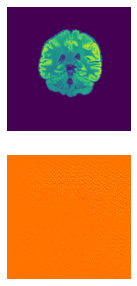

In [44]:
saliency = saliency
N = x.shape[0]
plt.subplot(2, N,1)
plt.imshow(input_batch.squeeze())
plt.axis('off')
plt.subplot(2, N, N +0 + 1)
plt.imshow(saliency.squeeze()[:,:,0], cmap=plt.cm.hot)
plt.axis('off')
plt.gcf().set_size_inches(12, 5)
plt.show()

In [38]:
scores

tensor([[0.2061]], grad_fn=<AddmmBackward0>)